In [1]:
import numpy as np
import pandas as pd

In [24]:
#dataset = pd.read_csv('pima.csv')
import io
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['iris.csv']))



Saving iris.csv to iris (1).csv


In [ ]:
dataset.head(10)

In [ ]:
dataset.tail(5)

In [ ]:
dataset.shape

In [ ]:
dataset.describe()

In [74]:
X = dataset.iloc[:, 0:4]
Y = dataset.iloc[:, 4]

In [ ]:
X.head(2)

In [ ]:
Y.head(2)

In [30]:
from sklearn.preprocessing import StandardScaler,LabelEncoder #แปลงข้อข้มูลมู (transform data)
from tensorflow.keras.utils import to_categorical

In [79]:
sc = StandardScaler()
X = sc.fit_transform(X)

label_enc= LabelEncoder()
y = label_enc.fit_transform(Y)
y = pd.get_dummies(y).values




In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [ ]:
print(Y_test)

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [84]:
from keras import Sequential
from keras.layers import Dense

In [85]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=4))
#Second Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Third Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Fouth Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(3, activation='softmax', kernel_initializer='random_normal'))
#output = activation(dot(input, kernel) + bias)

In [ ]:
classifier.summary()

In [86]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
#Fitting the data to training dataset
#classifier.fit(X_train, Y_train, batch_size=10, epochs=100)
history = classifier.fit(X_train, Y_train, batch_size=50, epochs=3, validation_data=(X_test,Y_test))

Epoch 1/3
3/3 [==============================] - 1s 124ms/step - loss: 1.0986 - accuracy: 0.3000 - val_loss: 1.0993 - val_accuracy: 0.2000
Epoch 2/3
3/3 [==============================] - 0s 16ms/step - loss: 1.0985 - accuracy: 0.3667 - val_loss: 1.0998 - val_accuracy: 0.2000
Epoch 3/3
3/3 [==============================] - 0s 16ms/step - loss: 1.0983 - accuracy: 0.3667 - val_loss: 1.1001 - val_accuracy: 0.2000


In [88]:
#eval_model = classifier.evaluate(X_train, Y_train)
#print(eval_model)
score = classifier.evaluate(X_train, Y_train, verbose = 0)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

Test loss :  1.0982457399368286
Test accuracy :  0.36666667461395264


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


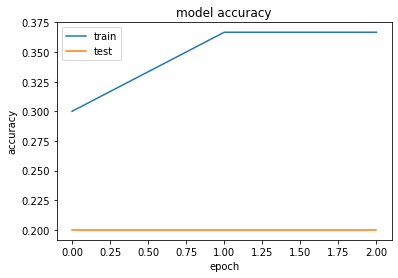

In [97]:
import matplotlib.pyplot as plt # For graphical representation
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
print(history.history.keys())

plt.show()

In [90]:
classifier.save("iris_model.h5")
print("Saved model.")

Saved model.


In [98]:
Y_pred = classifier.predict(X_test)
#Y_pred = (Y_pred > 0.5)


In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1),Y_pred.argmax(axis=1))
print(cm)

[[ 0  0 11]
 [ 0  0 13]
 [ 0  0  6]]
